### [ Shortest Path ( 최단 경로 알고리즘 ) ]
- 두 node의 최단 경로는?
- 주로 weighted graph에서 이용

유형
- 1) 단일 출발 & 단일 도착
- 2) 단일 출발
- 3) 전체 쌍 최단 경로

# Dijkstra's algorithm ( 다익스트라 알고리즘)
- 2) 단일출발 알고리즘에 해당
- 하나의 출발지 ~ 모든 도착지

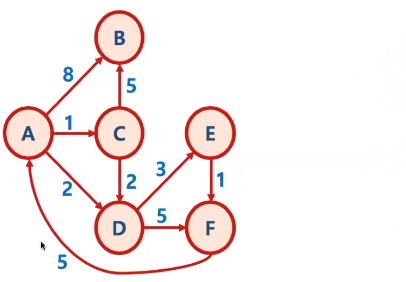

### 1) 초기화
- 첫 정점 : 0, 나머지는 inf
- 우선순위 queue에 첫 정점만 넣음

### 2) 인접한 Node와의 거리 계산
- 우선순위 큐에서 추출한 (A,0) [노드, 첫 노드와의 거리] 기반

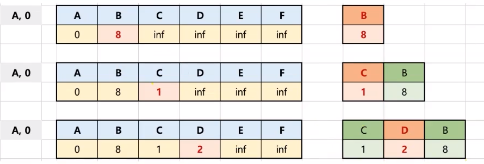

### 3) 인접한 Node와의 거리 계산
- 우선순위 큐에서 추출한 (C,1) [노드, 첫 노드와의 거리] 기반
- ex) D : (기존) 2  < (new) 1+2 ---> update X
- ex) B : (기존) 8 > (new) 1+5 ---> update O

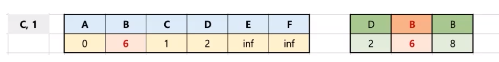

지금까지 접근 못했던 E,F에 new value 부여

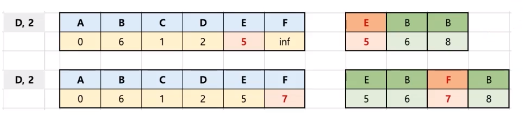

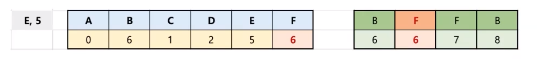

위와 같은 과정 반복

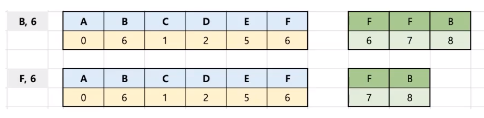

F,6이 있기 때문에 F,7은 계산할 필요도 없음

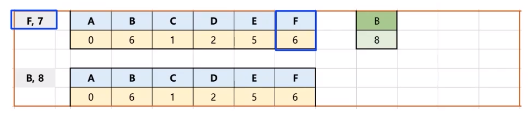

### 우선순위 큐 사용의 장점
- 먼 거리의 node, 나중으로 미뤄!

### 구현

1) heapq 라이브러리 이용

In [3]:
import heapq

In [4]:
queue = []

heapq.heappush(queue,[2,'A'])
heapq.heappush(queue,[7,'B'])
heapq.heappush(queue,[3,'C'])

In [5]:
queue

[[2, 'A'], [7, 'B'], [3, 'C']]

In [6]:
for i in range(len(queue)):
    print(heapq.heappop(queue))

[2, 'A']
[3, 'C']
[7, 'B']


2) graph

In [10]:
my_graph = {
    'A':{'B':8,'C':1,'D':2},
    'B':{},
    'C':{'B':5,'D':2},
    'D':{'E':3,'F':5},
    'E':{'F':1},
    'F':{'A':5}
}

3) Dijkstra's algorithm

In [11]:
def dijkstra(graph,start):
    dist = {node : float('inf') for node in graph}
    dist[start] = 0
    pri_q = []
    
    heapq.heappush(pri_q, (dist[start],start))
    
    while pri_q:
        current_distance, current_node = heapq.heappop(pri_q)
        
        if dist[current_node] < current_distance:
            continue
            
        for adj, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < dist[adj]: 
                dist[adj] = distance # update
                heapq.heappush(pri_q,[distance,adj])
    return dist           

In [12]:
dijkstra(my_graph,'A')

{'A': 0, 'B': 6, 'C': 1, 'D': 2, 'E': 5, 'F': 6}

### 시간 복잡도 : O(E*logE)